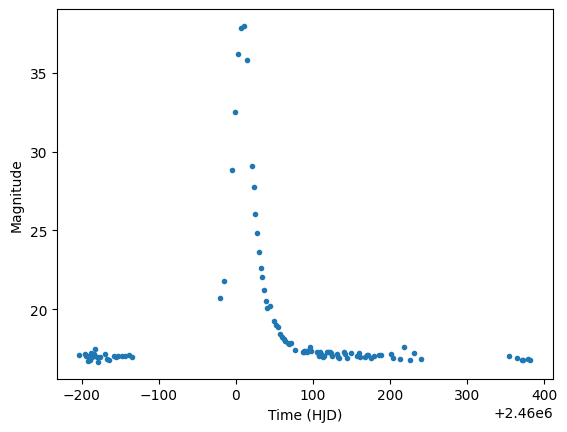

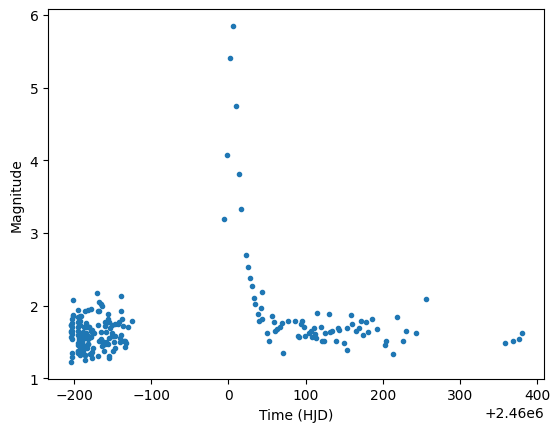

In [5]:
import pandas as pd
import matplotlib.pyplot as plt


def read_and_convert(file_name, I_0, plot=False):
    """
    This function reads a file for microlens event (.dat) and converts the magnitude to magnification.
    -------------------------
    Parameters:
    file_name (str): The name of the file to read.
    I_0 (float): The reference magnitude. (can be found in the data webpage and zip file)
    plot (bool): Whether to plot the data (magnification vs. time) or not.
    -------------------------
    Returns:
    data (DataFrame): The data read from the file with an additional column for magnification.
    """
    column_names = ["Timestamp", "Value", "Error", "seeing", "sky_level"]
    data = pd.read_csv(
        file_name,
        sep="\s+",
        names=column_names,
        header=None,
    )
    delta_I = data["Value"] - I_0
    data["Magnification"] = 10 ** (delta_I / -2.5)
    if plot:
        plt.figure()
        plt.plot(data["Timestamp"], data["Magnification"], ".", label="Magnification")
        plt.xlabel("Time (HJD)")
        plt.ylabel("Magnitude")
        plt.show()
    return data


I_0 = 19.767
data = read_and_convert("sample_data_OGLE/OGLE-2023-BLG-0063.dat", I_0, plot=True)
data2 = read_and_convert("sample_data_OGLE/OGLE-2023-BLG-0019.dat", I_0, plot=True)